In [1]:
import pandas as pd
import numpy as np

<hr>

## Steps in time series modeeling:

<pre>
1) Hypthesis Generation.
2) Data Analysis and hypothesis validation.
</pre>

<hr>

<hr>

## Hypothesis Generation:

* Generate some assumptions without looking at the dataset.

<hr>

## Problem Statement:

     Prediction of passengers in JetRail.
     
### Hypothesis Generation:

* Increase in passengers as years pass by.
* More trfafic on weekdays than on weekends.
* High from May to October (Tourists).
* Traffic is high in peak hours.

In [2]:
data = pd.read_csv("../data/Train_SU63ISt.csv")
data.head()

,ID,Datetime,Count
0,0,25-08-2012 00:00,8
1,1,25-08-2012 01:00,2
2,2,25-08-2012 02:00,6
3,3,25-08-2012 03:00,2
4,4,25-08-2012 04:00,2


In [3]:
print(data.dtypes)
print(data.shape)
data.describe()

ID           int64
Datetime    object
Count        int64
dtype: object
(18288, 3)


,ID,Count
count,18288.000000,18288.000000
mean,9143.500000,138.958115
std,5279.435197,153.467461
min,0.000000,2.000000
25%,4571.750000,22.000000
50%,9143.500000,84.000000
75%,13715.250000,210.000000
max,18287.000000,1244.000000


In [6]:
# Converting to datetime feature.
data["Datetime"] = pd.to_datetime(data["Datetime"], format="%d-%m-%Y %H:%M")
print(data.dtypes)
data.head()

ID                   int64
Datetime    datetime64[ns]
Count                int64
dtype: object


,ID,Datetime,Count
0,0,2012-08-25 00:00:00,8
1,1,2012-08-25 01:00:00,2
2,2,2012-08-25 02:00:00,6
3,3,2012-08-25 03:00:00,2
4,4,2012-08-25 04:00:00,2


In [10]:
data["Year"], data["Month"], data["Date"], data["Hour"] = data["Datetime"].dt.year, data["Datetime"].dt.month, data["Datetime"].dt.day, data["Datetime"].dt.hour

data.head()

,ID,Datetime,Count,Year,Month,Day,Hour,Date
0,0,2012-08-25 00:00:00,8,2012,8,25,0,25
1,1,2012-08-25 01:00:00,2,2012,8,25,1,25
2,2,2012-08-25 02:00:00,6,2012,8,25,2,25
3,3,2012-08-25 03:00:00,2,2012,8,25,3,25
4,4,2012-08-25 04:00:00,2,2012,8,25,4,25


In [11]:
# start with 0 --> 6
data["Day"] = data["Datetime"].dt.dayofweek

data.head()

,ID,Datetime,Count,Year,Month,Day,Hour,Date
0,0,2012-08-25 00:00:00,8,2012,8,5,0,25
1,1,2012-08-25 01:00:00,2,2012,8,5,1,25
2,2,2012-08-25 02:00:00,6,2012,8,5,2,25
3,3,2012-08-25 03:00:00,2,2012,8,5,3,25
4,4,2012-08-25 04:00:00,2,2012,8,5,4,25


In [12]:
# mapping 1 to weekends 0 to weekdays
week_dict = {
    x : 1 if x in (5,6) else 0 for x in range(7)
}
week_dict

{0: 0, 1: 0, 2: 0, 3: 0, 4: 0, 5: 1, 6: 1}

In [13]:
data["Day"] = data["Day"].map(week_dict)
data.head()

,ID,Datetime,Count,Year,Month,Day,Hour,Date
0,0,2012-08-25 00:00:00,8,2012,8,1,0,25
1,1,2012-08-25 01:00:00,2,2012,8,1,1,25
2,2,2012-08-25 02:00:00,6,2012,8,1,2,25
3,3,2012-08-25 03:00:00,2,2012,8,1,3,25
4,4,2012-08-25 04:00:00,2,2012,8,1,4,25


In [14]:
# Making time series as index --> so that it is easy to plot.
# index is treated as x axis.

data.index = data["Datetime"]
data.head()

,ID,Datetime,Count,Year,Month,Day,Hour,Date
Datetime,,,,,,,,
2012-08-25 00:00:00,0,2012-08-25 00:00:00,8,2012,8,1,0,25
2012-08-25 01:00:00,1,2012-08-25 01:00:00,2,2012,8,1,1,25
2012-08-25 02:00:00,2,2012-08-25 02:00:00,6,2012,8,1,2,25
2012-08-25 03:00:00,3,2012-08-25 03:00:00,2,2012,8,1,3,25
2012-08-25 04:00:00,4,2012-08-25 04:00:00,2,2012,8,1,4,25


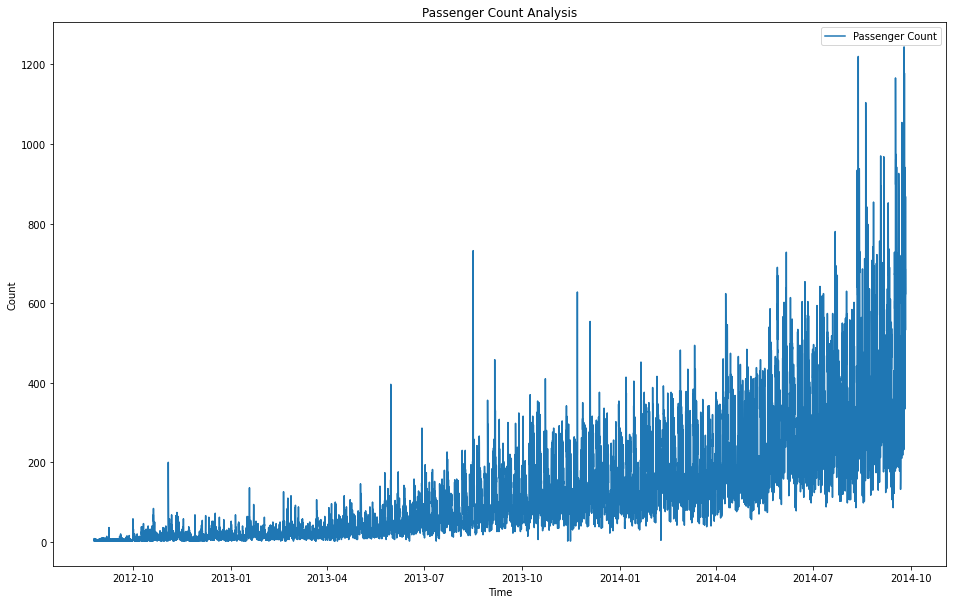

In [19]:
import matplotlib.pyplot as plt

plt.figure(figsize=(16,10))
plt.plot(data["Count"], label="Passenger Count")
plt.title("Passenger Count Analysis")
plt.xlabel("Time")
plt.ylabel("Count")
# semicolon to supress output
plt.legend();

In [20]:
data.describe()

,ID,Count,Year,Month,Day,Hour,Date
count,18288.000000,18288.000000,18288.000000,18288.000000,18288.000000,18288.000000,18288.000000
mean,9143.500000,138.958115,2013.182415,6.620735,0.286089,11.500000,15.744094
std,5279.435197,153.467461,0.698390,3.406007,0.451944,6.922376,8.803358
min,0.000000,2.000000,2012.000000,1.000000,0.000000,0.000000,1.000000
25%,4571.750000,22.000000,2013.000000,4.000000,0.000000,5.750000,8.000000
50%,9143.500000,84.000000,2013.000000,7.000000,0.000000,11.500000,16.000000
75%,13715.250000,210.000000,2014.000000,9.000000,1.000000,17.250000,23.000000
max,18287.000000,1244.000000,2014.000000,12.000000,1.000000,23.000000,31.000000


Text(0.5, 1.0, 'Number of passengers wrt to years')

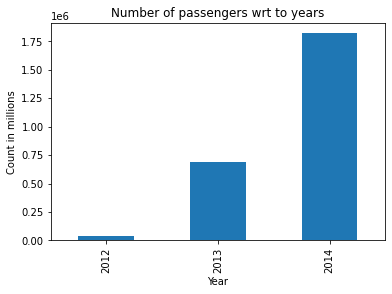

In [26]:
# Year ranges from 2012 to 2014
# Analysing count on these years.

factor = "Year"

data.groupby(factor)["Count"].sum().plot.bar()
plt.ylabel("Count in millions")
plt.title("Number of passengers wrt to years")

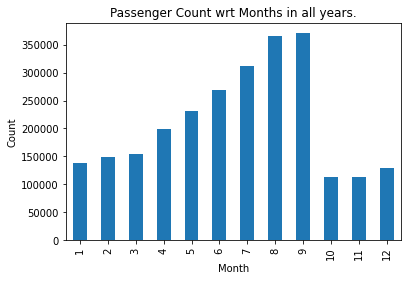

In [30]:
factor = "Month"

data.groupby(factor)["Count"].sum().plot.bar()
plt.title("Passenger Count wrt Months in all years.")
plt.ylabel("Count");

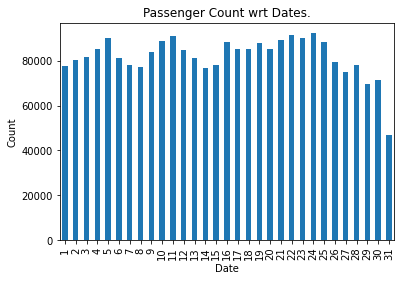

In [31]:
factor = "Date"

data.groupby(factor)["Count"].sum().plot.bar()
plt.title("Passenger Count wrt Dates.")
plt.ylabel("Count");

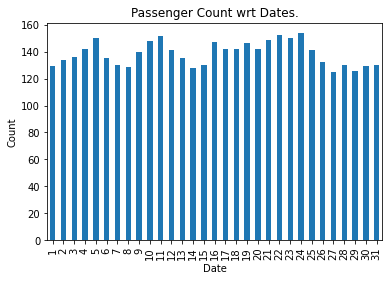

In [33]:
# Mean is giving a different result as 31 doesn't occur in all months
data.groupby(factor)["Count"].mean().plot.bar()
plt.title("Passenger Count wrt Dates.")
plt.ylabel("Count");

In [34]:
def plot_by_factor(factor, data):
    data.groupby(factor)["Count"].mean().plot.bar()

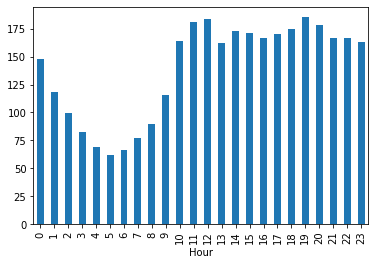

In [35]:
plot_by_factor("Hour", data)

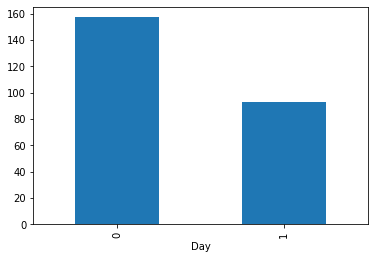

In [36]:
plot_by_factor("Day", data)

In [37]:
hourly_data = data.resample("H").mean()
hourly_data

,ID,Count,Year,Month,Day,Hour,Date
Datetime,,,,,,,
2012-08-25 00:00:00,0,8,2012,8,1,0,25
2012-08-25 01:00:00,1,2,2012,8,1,1,25
2012-08-25 02:00:00,2,6,2012,8,1,2,25
2012-08-25 03:00:00,3,2,2012,8,1,3,25
2012-08-25 04:00:00,4,2,2012,8,1,4,25
...,...,...,...,...,...,...,...
2014-09-25 19:00:00,18283,868,2014,9,0,19,25
2014-09-25 20:00:00,18284,732,2014,9,0,20,25
2014-09-25 21:00:00,18285,702,2014,9,0,21,25


In [38]:
hourly_data.describe()

,ID,Count,Year,Month,Day,Hour,Date
count,18288.000000,18288.000000,18288.000000,18288.000000,18288.000000,18288.000000,18288.000000
mean,9143.500000,138.958115,2013.182415,6.620735,0.286089,11.500000,15.744094
std,5279.435197,153.467461,0.698390,3.406007,0.451944,6.922376,8.803358
min,0.000000,2.000000,2012.000000,1.000000,0.000000,0.000000,1.000000
25%,4571.750000,22.000000,2013.000000,4.000000,0.000000,5.750000,8.000000
50%,9143.500000,84.000000,2013.000000,7.000000,0.000000,11.500000,16.000000
75%,13715.250000,210.000000,2014.000000,9.000000,1.000000,17.250000,23.000000
max,18287.000000,1244.000000,2014.000000,12.000000,1.000000,23.000000,31.000000


In [45]:
daily_data = data.resample("D").mean()
display(daily_data.describe())
daily_data.head()

,ID,Count,Year,Month,Day,Hour,Date
count,762.000000,762.000000,762.000000,762.000000,762.000000,762.0,762.000000
mean,9143.500000,138.958115,2013.182415,6.620735,0.286089,11.5,15.744094
std,5282.753827,135.911437,0.698830,3.408151,0.452228,0.0,8.808900
min,11.500000,2.416667,2012.000000,1.000000,0.000000,11.5,1.000000
25%,4577.500000,24.250000,2013.000000,4.000000,0.000000,11.5,8.000000
50%,9143.500000,99.125000,2013.000000,7.000000,0.000000,11.5,16.000000
75%,13709.500000,215.958333,2014.000000,9.000000,1.000000,11.5,23.000000
max,18275.500000,702.333333,2014.000000,12.000000,1.000000,11.5,31.000000


,ID,Count,Year,Month,Day,Hour,Date
Datetime,,,,,,,
2012-08-25,11.5,3.166667,2012.0,8.0,1.0,11.5,25.0
2012-08-26,35.5,3.666667,2012.0,8.0,1.0,11.5,26.0
2012-08-27,59.5,2.583333,2012.0,8.0,0.0,11.5,27.0
2012-08-28,83.5,2.416667,2012.0,8.0,0.0,11.5,28.0
2012-08-29,107.5,2.500000,2012.0,8.0,0.0,11.5,29.0


In [43]:
monthly_data = data.resample("M").mean()
display(monthly_data.describe())
monthly_data.head()

,ID,Count,Year,Month,Day,Hour,Date
count,26.000000,26.000000,26.000000,26.000000,26.000000,26.0,26.000000
mean,8925.653846,136.929955,2013.153846,6.653846,0.285829,11.5,16.076923
std,5557.850431,131.874094,0.731700,3.428613,0.027696,0.0,2.524648
min,83.500000,2.952381,2012.000000,1.000000,0.240000,11.5,13.000000
25%,4352.500000,22.540035,2013.000000,4.000000,0.258065,11.5,15.500000
50%,8921.500000,110.440771,2013.000000,7.000000,0.285714,11.5,16.000000
75%,13466.500000,196.150442,2014.000000,9.000000,0.300000,11.5,16.000000
max,17987.500000,468.433333,2014.000000,12.000000,0.333333,11.5,28.000000


,ID,Count,Year,Month,Day,Hour,Date
Datetime,,,,,,,
2012-08-31,83.5,2.952381,2012.0,8.0,0.285714,11.5,28.0
2012-09-30,527.5,4.444444,2012.0,9.0,0.333333,11.5,15.5
2012-10-31,1259.5,10.986559,2012.0,10.0,0.258065,11.5,16.0
2012-11-30,1991.5,15.827778,2012.0,11.0,0.266667,11.5,15.5
2012-12-31,2723.5,15.680108,2012.0,12.0,0.322581,11.5,16.0


In [44]:
weekly_data = data.resample("W").mean()
display(weekly_data.describe())
weekly_data.head()

,ID,Count,Year,Month,Day,Hour,Date
count,110.000000,110.000000,110.000000,110.000000,110.000000,110.0,110.000000
mean,9119.718182,139.907846,2013.177922,6.638961,0.289610,11.5,15.837662
std,5357.409530,132.328400,0.704171,3.350113,0.073582,0.0,6.936825
min,23.500000,3.119048,2012.000000,1.000000,0.000000,11.5,4.000000
25%,4541.500000,24.130952,2013.000000,4.000000,0.285714,11.5,10.000000
50%,9119.500000,116.166667,2013.000000,7.000000,0.285714,11.5,16.000000
75%,13697.500000,205.443452,2014.000000,9.000000,0.285714,11.5,21.142857
max,18239.500000,608.625000,2014.000000,12.000000,1.000000,11.5,28.000000


,ID,Count,Year,Month,Day,Hour,Date
Datetime,,,,,,,
2012-08-26,23.5,3.416667,2012.0,8.000000,1.000000,11.5,25.500000
2012-09-02,131.5,3.345238,2012.0,8.285714,0.285714,11.5,21.142857
2012-09-09,299.5,3.654762,2012.0,9.000000,0.285714,11.5,6.000000
2012-09-16,467.5,3.119048,2012.0,9.000000,0.285714,11.5,13.000000
2012-09-23,635.5,4.714286,2012.0,9.000000,0.285714,11.5,20.000000


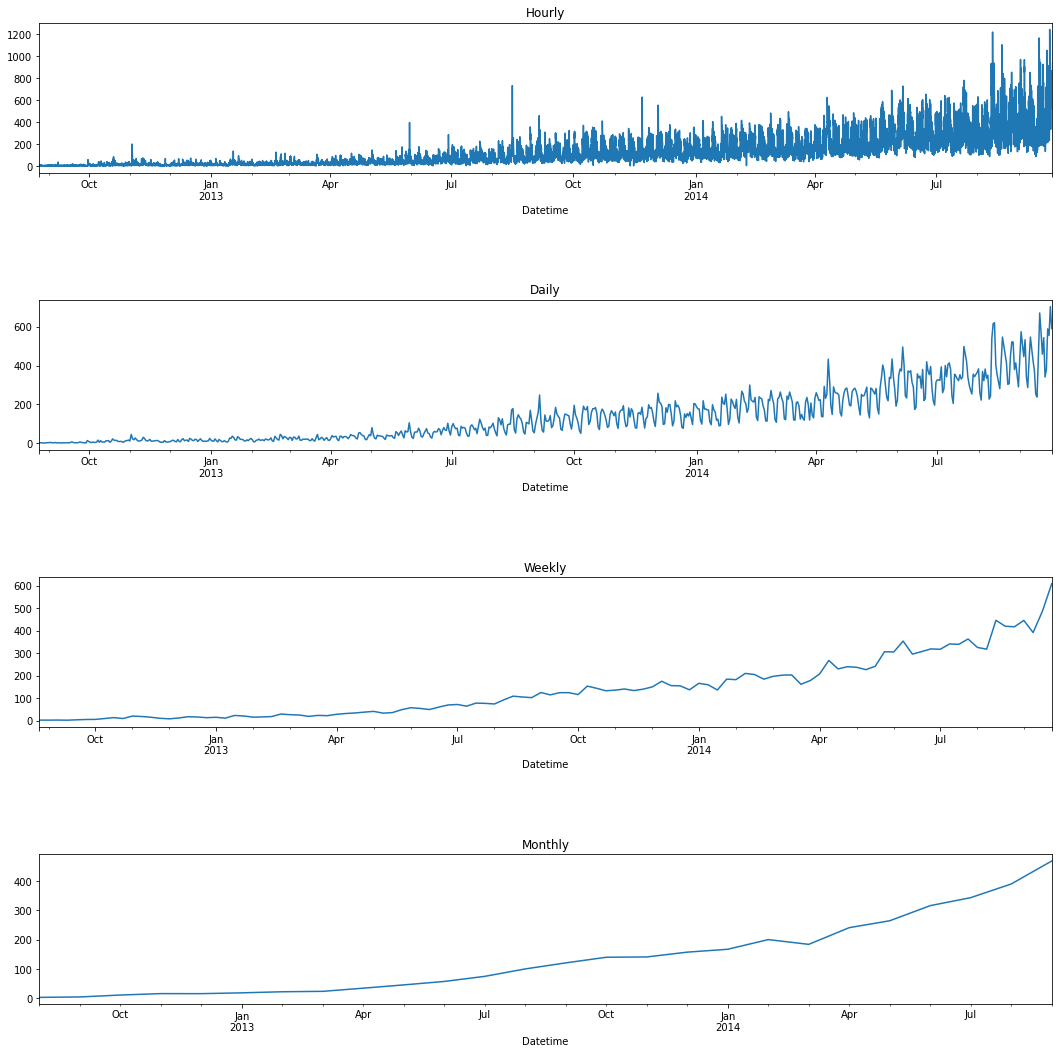

In [54]:
fig, ax = plt.subplots(4,1)
fig.tight_layout()
hourly_data.Count.plot(figsize=(16,16),title="Hourly", ax = ax[0])
weekly_data.Count.plot(figsize=(16,16),title="Weekly", ax = ax[2])
monthly_data.Count.plot(figsize=(16,16),title="Monthly", ax = ax[3])
daily_data.Count.plot(figsize=(16,16),title="Daily", ax = ax[1])

In [55]:
data

,ID,Datetime,Count,Year,Month,Day,Hour,Date
Datetime,,,,,,,,
2012-08-25 00:00:00,0,2012-08-25 00:00:00,8,2012,8,1,0,25
2012-08-25 01:00:00,1,2012-08-25 01:00:00,2,2012,8,1,1,25
2012-08-25 02:00:00,2,2012-08-25 02:00:00,6,2012,8,1,2,25
2012-08-25 03:00:00,3,2012-08-25 03:00:00,2,2012,8,1,3,25
2012-08-25 04:00:00,4,2012-08-25 04:00:00,2,2012,8,1,4,25
...,...,...,...,...,...,...,...,...
2014-09-25 19:00:00,18283,2014-09-25 19:00:00,868,2014,9,0,19,25
2014-09-25 20:00:00,18284,2014-09-25 20:00:00,732,2014,9,0,20,25
2014-09-25 21:00:00,18285,2014-09-25 21:00:00,702,2014,9,0,21,25


In [56]:
train, test = data.loc["2012-08-25":"2014-06-24"], data.loc["2014-06-25":]

display(train.head())

display(test.head())


,ID,Datetime,Count,Year,Month,Day,Hour,Date
Datetime,,,,,,,,
2012-08-25 00:00:00,0,2012-08-25 00:00:00,8,2012,8,1,0,25
2012-08-25 01:00:00,1,2012-08-25 01:00:00,2,2012,8,1,1,25
2012-08-25 02:00:00,2,2012-08-25 02:00:00,6,2012,8,1,2,25
2012-08-25 03:00:00,3,2012-08-25 03:00:00,2,2012,8,1,3,25
2012-08-25 04:00:00,4,2012-08-25 04:00:00,2,2012,8,1,4,25


,ID,Datetime,Count,Year,Month,Day,Hour,Date
Datetime,,,,,,,,
2014-06-25 00:00:00,16056,2014-06-25 00:00:00,332,2014,6,0,0,25
2014-06-25 01:00:00,16057,2014-06-25 01:00:00,260,2014,6,0,1,25
2014-06-25 02:00:00,16058,2014-06-25 02:00:00,218,2014,6,0,2,25
2014-06-25 03:00:00,16059,2014-06-25 03:00:00,244,2014,6,0,3,25
2014-06-25 04:00:00,16060,2014-06-25 04:00:00,168,2014,6,0,4,25


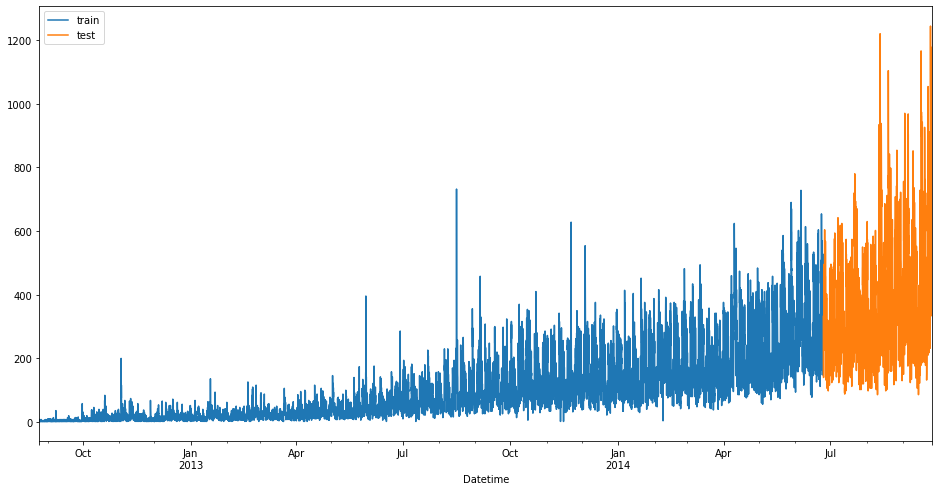

In [59]:
train["Count"].plot(figsize=(16,8), label="train")
test["Count"].plot(figsize=(16,8), label="test")
plt.legend()

<hr>

## Methods for Time Series Modelling:

* Naive approach
* Moving average
* Simple Exponential Smoothing
* Holt's linear trend model

<hr>

/Users/i518758/Desktop/DeepLearning/tf_env/lib/python3.8/site-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


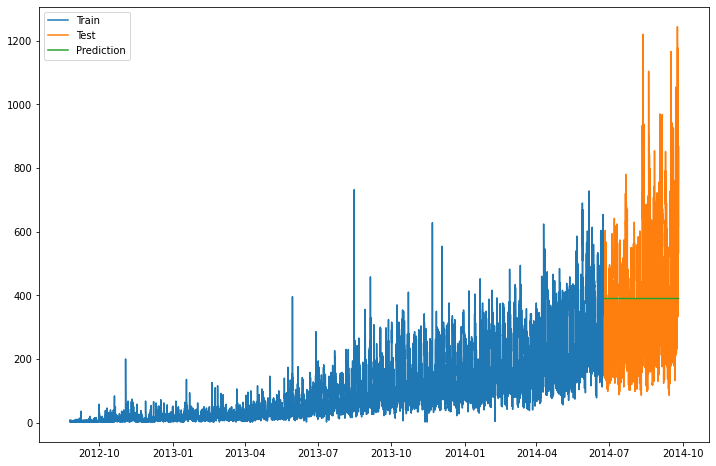

In [65]:
# Naive Approach
# Predicting next value is equal to past value --> a horizontal line.

pred_array = np.asarray(train["Count"])

# Assigning the last value.
test.loc[:,"naive"] = pred_array[len(pred_array)-1]

plt.figure(figsize=(12,8))
plt.plot(train.index, train["Count"], label="Train")
plt.plot(test.index, test["Count"], label="Test")
plt.plot(test.index, test["naive"], label="Prediction")

plt.legend(loc="best")

In [68]:
# Finding out root mean squared error.

from sklearn.metrics import mean_squared_error
from math import sqrt

rmse = sqrt(mean_squared_error(test["Count"], test["naive"]))
rmse

186.37368520699056

<hr>

## Moving Average:

Average of last n observations.

<hr>

<hr>

## Simple Exponential Smoothing:

Give more priority to previous values rather than initial set of values by assosiating them with weights.

<hr>

<hr>

## ARIMA Model:

    AutoRegressive Integrated Moving Average
    
* AR: Autoregression. A model that uses the dependent relationship
    between an observation and some number of lagged observations.
    
* I: Integrated. The use of differencing of raw observations (e.g. subtracting an observation from an observation at the previous time step) in order to make the time series stationary.

* MA: Moving Average. A model that uses the dependency between an observation and a residual error from a moving average model applied to lagged observations.